In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x, w, b):
    return 1/(1+np.exp(-(w*x+b)))

In [ ]:
sigmoid(1, 0.5, 0)

0.6224593312018546

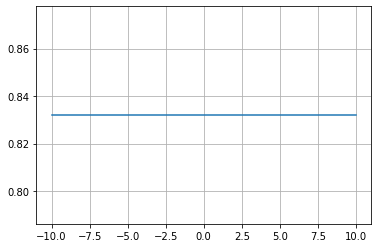

In [ ]:
w = 0 #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 1.6 #@param {type: "slider", min: -2, max: 2, step: 0.1}
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x, w, b))
plt.grid()
plt.show()

In [ ]:
sigmoid_2d = lambda x1, x2, w1, w2, b : 1/(1 + np.exp(-(w1*x1+w2*x2+b)))

In [ ]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 80)

X1, X2 = np.meshgrid(x1, x2)

X1.shape, X2.shape

((80, 100), (80, 100))

In [ ]:
print(x1)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [ ]:
print(X1[0])

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [ ]:
w1 = 0.5; w2 = 0.5; b = 0
Y = sigmoid_2d(X1, X2, w1, w2, b)

In [ ]:
import matplotlib.colors

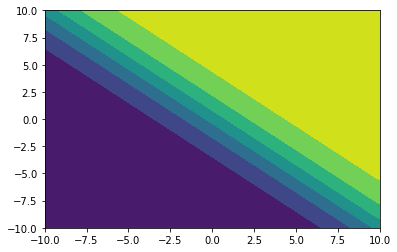

In [ ]:
plt.contourf(X1, X2, Y)
plt.show()

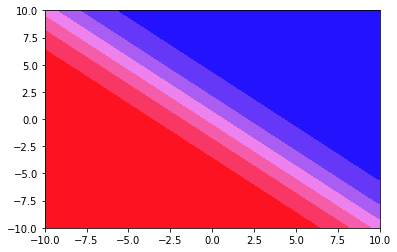

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "violet", "blue"])
plt.contourf(X1, X2, Y, cmap=my_cmap)
plt.show()

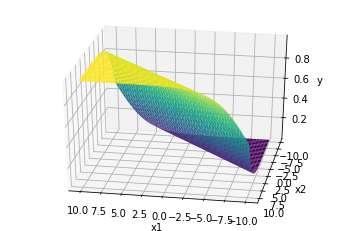

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 100)
plt.show()

In [ ]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10 # generate random nos from -10 to 10
Y = sigmoid(X, w_unknown, b_unknown)

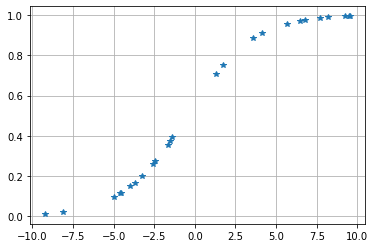

In [ ]:
plt.plot(X, Y, '*')
plt.grid()
plt.show()

In [ ]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2
    return loss

In [ ]:
W = np.linspace(0, 2, 100)
B = np.linspace(-1, 1, 100)

WW, BB = np.meshgrid(W, B) # go through every possible values of W and B

Loss = np.zeros(WW.shape)

In [ ]:
Loss.shape

(100, 100)

In [ ]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

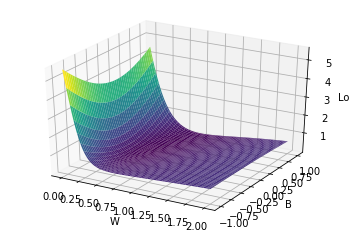

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

# ax.view_init(30, 100)
plt.show()

In [ ]:
ij = np.argmin(Loss) # returns index of the min value index of the flattened array

In [ ]:
print(ij)

6225


In [ ]:
i = np.floor(ij/Loss.shape[1])
j = ij - i * Loss.shape[1]
i, j = int(i), int(j)

In [ ]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    """
    computes x1*w1 + x2*w2 . . . + b
    """
    def perceptron(self, x):
        return np.dot(x.reshape(1, -1), self.w.T) + self.b
    
    """
    computes 1 / (1 + e^-x)
    """
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self, x, y):
        # compute the predicted value, 1 / (1 + e^perceptron(x))
        # perceptron(x) will give x1*w1+x2*w2 . . . +b
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b(self, x, y):
        # compute the predicted value, 1 / (1 + e^perceptron(x))
        # perceptron(x) will give x1*w1+x2*w2 . . . +b
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * 1.0

    def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True):

        # initialize w, b

        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        # run for epoch number of times
        for i in range(epochs):
            dw = 0
            db = 0
            # calculate delta_w and delta_b 
            for x, y in zip(X, Y):
                dw += self.grad_w(x, y)
                db += self.grad_b(x, y)

            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            

In [ ]:
def plot_sn(X, Y, sn, ax):
    X1 = np.linspace(-10, 10, 100)
    X2 = np.linspace(-10, 10, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    
    YY = np.zeros(XX1.shape)

    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X1[j], X2[i]])
            YY[i, j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=my_cmap)
    ax.plot()

In [ ]:
X = np.array([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = np.array([1, 1, 1, 0, 0, 0])
X.shape, Y.shape

((6, 2), (6,))

[[ 0.41485312 -0.48363151]] [[-0.00013153]]
[[0.93948567 0.100383  ]] [[-0.01310889]]
[[ 0.94039199 -0.60434406]] [[-0.04694674]]
[[ 1.28006196 -0.0831209 ]] [[-0.11345389]]
[[ 1.20582587 -0.69397652]] [[-0.207455]]
[[ 1.49401523 -0.22382995]] [[-0.27545933]]
[[ 1.41862782 -0.720821  ]] [[-0.36897322]]
[[ 1.62968818 -0.37222264]] [[-0.42469059]]
[[ 1.59518854 -0.63780406]] [[-0.48358375]]
[[ 1.68279302 -0.51733399]] [[-0.51462291]]
[[ 1.69827318 -0.57330581]] [[-0.54449676]]
[[ 1.73186292 -0.56976699]] [[-0.56904562]]
[[ 1.75825089 -0.58087033]] [[-0.59241427]]
[[ 1.78409237 -0.58875674]] [[-0.6141031]]
[[ 1.8084488  -0.59655692]] [[-0.63443084]]
[[ 1.83158791 -0.6039421 ]] [[-0.65353083]]
[[ 1.85361626 -0.61097535]] [[-0.67153233]]
[[ 1.8746345  -0.61768792]] [[-0.68854514]]
[[ 1.89473011 -0.62410761]] [[-0.70466406]]
[[ 1.91397979 -0.63025879]] [[-0.71997141]]


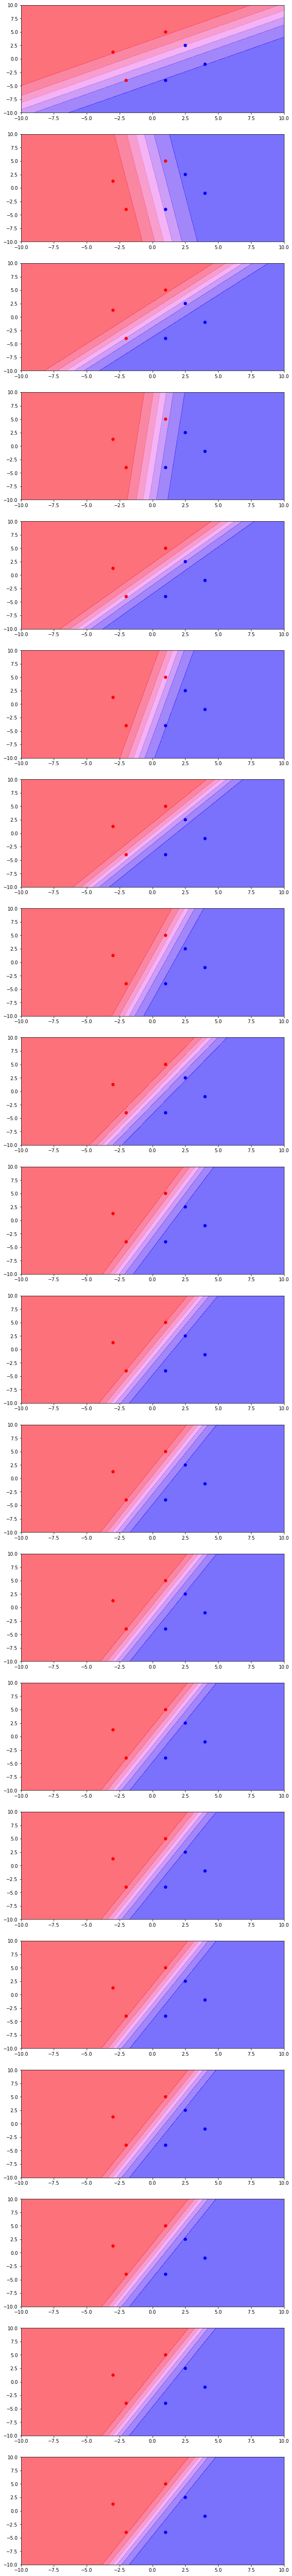

In [ ]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.01, True)

N = 20
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i+1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.75, False)
plt.show()

In [ ]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10 # generate random nos from -10 to 10
Y = sigmoid(X, w_unknown, b_unknown)
X=X.reshape(25,1)
print(X.shape[1])

1


[[-0.47189466]] [[0.00193528]]


ValueError: ignored

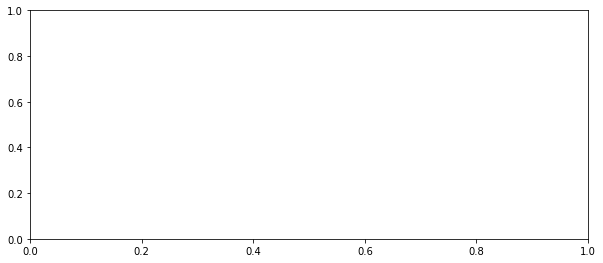

In [ ]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.01, True)

N = 20
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N, 1, i+1)
    plot_sn(X, Y, sn, ax)
    sn.fit(X, Y, 1, 0.75, False)
plt.show()

In [ ]:
np.random.randn(1, 1)

array([[-0.66035702]])

In [ ]:
X.reshape(1,-1)

array([[-1.51538837,  8.53816521, -8.23615828, -3.34225053,  0.7768941 ,
        -0.46917943,  8.41797799,  5.87724999,  3.92705156,  3.43294833,
        -7.91432851, -0.21975307,  5.46294064, -4.17885508, -6.36114899,
         0.0945289 , -8.0927347 , -5.99182137,  5.63478416,  4.32126635,
        -6.81541965,  3.17445997, -2.52565409,  1.6990674 , -7.49780003]])